# Testing and regularization

In [ ]:
!git clone https://github.com/s7s/machine_learning_1.git
%cd  machine_learning_1/polynomial_regression

Cloning into 'machine_learning_1'...
remote: Enumerating objects: 109, done.
remote: Counting objects: 100% (109/109), done.
remote: Compressing objects: 100% (79/79), done.
remote: Total 109 (delta 42), reused 94 (delta 27), pack-reused 0
Receiving objects: 100% (109/109), 33.19 MiB | 22.72 MiB/s, done.
Resolving deltas: 100% (42/42), done.
/content/machine_learning_1/polynomial_regression


In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
random.seed(0)

## Defining our dataset

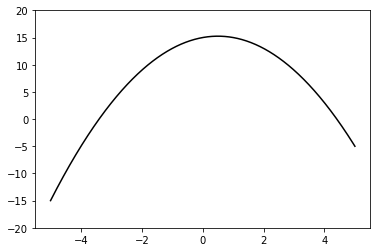

In [ ]:
# Our original polynomial is -x^2+x+15
coefs = [15,1,-1]

def polynomial(coefs, x):
    n = len(coefs)
    return sum([coefs[i]*x**i for i in range(n)])

def draw_polynomial(coefs):
    n = len(coefs)
    x = np.linspace(-5, 5, 1000)
    plt.ylim(-20,20)
    plt.plot(x, sum([coefs[i]*x**i for i in range(n)]), linestyle='-', color='black')

draw_polynomial(coefs)

In [ ]:
X = []
Y = []
for i in range(40):
    x = random.uniform(-5,5)
    y = polynomial(coefs, x) + random.gauss(0,2)
    X.append(x)
    Y.append(y)
X=np.array(X)
Y=np.array(Y)

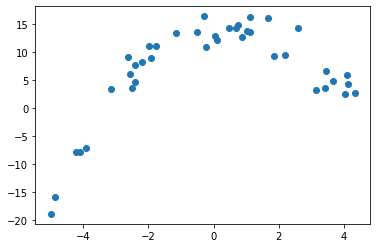

In [ ]:
plt.scatter(X, Y)
#draw_polynomial(coefs)

## Training a polynomial regression model

In [ ]:
for datasample in zip(X,Y):
    print(datasample)

(3.4442185152504816, 6.685961311021467)
(-2.4108324970703663, 4.690236225597948)
(0.11274721368608542, 12.205789026637378)
(-1.9668727392107255, 11.133217991032268)
(-0.23403045847644144, 10.927272159051856)
(0.046868558173902564, 12.8584762866286)
(-2.1816215560029617, 8.16012255928749)
(-2.4949365863755943, 3.5061587527226514)
(4.097462559682402, 5.933186396721837)
(4.021659504395828, 2.454299054753137)
(-1.8985243068066735, 8.956020414039855)
(1.8398393191544127, 9.208004401915796)
(-0.2785728454728664, 16.36505651355184)
(1.1088697344380165, 16.14144978027318)
(4.130110532378982, 4.299534274468492)
(3.6530992777164, 4.83366913200435)
(-2.395076896080406, 7.723543125251446)
(-4.8595829983598104, -15.848718674227753)
(2.1970468640395415, 9.366124268570305)
(1.6815320123185087, 16.070558182542374)
(-4.988571806855717, -18.893035332565795)
(-2.5608912311286804, 6.043189895391749)
(-1.7479563725260991, 11.091071520573042)
(0.6751074062067186, 14.272553413210698)
(-2.6138407138477984, 9.

### Adding columns to our dataset corresponding to $x^2, x^3, \ldots, x^{200}$

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
def addPoly(X,polyDegree):
    ## TODO ##
    #use sklearn (PolynomialFeatures method)
    poly = PolynomialFeatures(polyDegree, include_bias=False)
    X = poly.fit_transform(X.reshape(-1,1))
    return X
X_poly=addPoly(X,200)

In [ ]:
print(X_poly.shape)
print(X_poly[0,:])

(40, 200)
[3.44421852e+000 1.18626412e+001 4.08575284e+001 1.40722256e+002
 4.84678199e+002 1.66933763e+003 5.74956356e+003 1.98027533e+004
 6.82050095e+004 2.34912956e+005 8.09091554e+005 2.78668811e+006
 9.59796279e+006 3.30574811e+007 1.13857189e+008 3.92149037e+008
 1.35064697e+009 4.65192332e+009 1.60222404e+010 5.51840971e+010
 1.90066089e+011 6.54629143e+011 2.25468581e+012 7.76563063e+012
 2.67465288e+013 9.21208897e+013 3.17284474e+014 1.09279706e+015
 3.76383187e+015 1.29634594e+016 4.46489869e+016 1.53780867e+017
 5.29654911e+017 1.82424725e+018 6.28310616e+018 2.16403906e+019
 7.45342338e+019 2.56712188e+020 8.84172871e+020 3.04528457e+021
 1.04886255e+022 3.61251182e+022 1.24422801e+023 4.28539315e+023
 1.47598304e+024 5.08360812e+024 1.75090572e+025 6.03050191e+025
 2.07703663e+026 7.15376803e+026 2.46391403e+027 8.48625832e+027
 2.92285280e+028 1.00669437e+029 3.46727540e+029 1.19420541e+030
 4.11310440e+030 1.41664303e+031 4.87922816e+031 1.68051280e+032
 5.78805329e+03

## Splitting data into training and testing

In [ ]:
from sklearn.model_selection import train_test_split
## TODO ##
# use sklearn (train_test_split) to split data to 80% training 20% testing
X_train, X_test, y_train, y_test = train_test_split(X_poly,Y,test_size=0.2)

In [ ]:
from sklearn.metrics import mean_squared_error
def display_results(model):
    coefs = [model.intercept_]
    coefs += list(model.coef_)
    ytrain_predict=model.predict(X_train)
    ytest_predict=model.predict(X_test)
    train_error=np.sqrt(mean_squared_error(y_train,ytrain_predict))
    test_error=np.sqrt(mean_squared_error(y_test,ytest_predict))
    print("Training error (rmse):", train_error)
    print("Testing error (rmse):", test_error)
    plt.scatter(X_train[:,0], y_train, marker='o')
    plt.scatter(X_test[:,0], y_test, marker='^')
    draw_polynomial(coefs)
    plt.show()
    print("Polynomial coefficients")
    print(coefs)

## Training a polynomial regression model with no regularization

In [ ]:
from sklearn.linear_model import LinearRegression
## TODO ##
# use sklearn linear regression to fit the data 
# normalization trick ;)
model_no_reg =  LinearRegression(normalize=True).fit(X_train, y_train)

Training error (rmse): 0.4362987734431533
Testing error (rmse): 1851348449090321.5


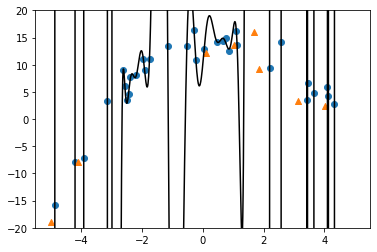

Polynomial coefficients
[9.942611437956108, 58.09783585564246, 107.01873317400425, -1018.731639950163, -81.86860906643926, 4992.509921836581, -1839.6885701679955, -9845.691007010917, 4077.3622515448974, 10540.413295100734, -3422.8571443581973, -6841.977788754991, 1317.3013712751717, 2745.134799279115, -196.39275795429788, -668.1085063857453, -10.094036259790325, 95.5913595978254, 6.433201706419314, -7.43925023964779, -0.6422387049035567, 0.2347004223201076, 0.010300579564218097, 0.003423456003915901, 0.0012393591297839522, -0.00023605766503108073, -5.9921227297074245e-06, -6.7279177114765416e-06, -2.1372129352860075e-06, 6.881521746814126e-08, -6.78737809225796e-08, 8.88606547866988e-09, 3.457639004884366e-10, 2.805436854906016e-10, 1.1198710961998218e-10, 3.764005734664319e-12, 5.7395586145564036e-12, -1.2304858755786703e-13, 1.668384764301184e-13, -1.1633393390333906e-14, 2.185910221391103e-15, -5.711038645893563e-16, -9.93695377683071e-17, -2.1343952189301486e-17, -9.908740508262024

In [ ]:
display_results(model_no_reg)

## Training a polynomial regression model with L1 regularization

In [ ]:
from sklearn import linear_model
## TODO ##
# use sklearn Lasso (linear regression with L1 Norm) to fit the data 
# normalization trick ;)

model_L1_reg = linear_model.Lasso(alpha=0.1,normalize=True).fit(X_train, y_train)

Training error (rmse): 1.957054034801364
Testing error (rmse): 2.8805979231233456


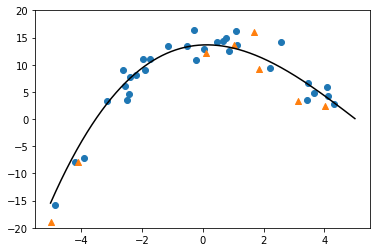

Polynomial coefficients
[13.639029977454992, 0.22679771065527857, -0.8527102908983488, 0.05304407990895214, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -

In [ ]:
display_results(model_L1_reg)

## Training a polynomial regression model with L2 regularization

In [ ]:
from sklearn import linear_model
## TODO ##
# use sklearn Ridge (linear regression with L2 Norm) to fit the data 
# normalization trick ;)

model_L2_reg = linear_model.Ridge(normalize=True).fit(X_train, y_train)

Training error (rmse): 2.9890115289995154
Testing error (rmse): 115.43772424701692


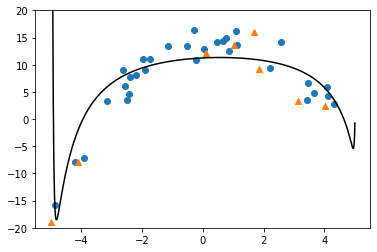

Polynomial coefficients
[11.251792973037833, 0.2804176630570741, -0.2531467055506675, 0.013135517974791386, -0.008779439999153385, 0.0005423532951758915, -0.00029584124184701467, 2.1046280914249132e-05, -9.552639320936658e-06, 7.599611479985481e-07, -2.967102894472971e-07, 2.563908746622464e-08, -8.987438478900823e-09, 8.193989193401406e-10, -2.6862850236216563e-10, 2.5128407036014125e-11, -7.977478304453556e-12, 7.451539400911884e-13, -2.359766413983536e-13, 2.1395437607916913e-14, -6.947209110161315e-15, 5.911137648126211e-16, -2.028200671444093e-16, 1.542970418307229e-17, -5.831839260681315e-18, 3.6355002070979965e-19, -1.6322168875260712e-19, 6.700218925381019e-21, -4.351335897526917e-21, 2.3941248967202808e-23, -1.054630197602674e-22, -6.726975579921779e-24, -2.026473573191387e-24, -5.150194787414789e-25, -9.884003091568492e-27, -2.863903643287658e-26, 1.9562580134865057e-27, -1.4150078375424825e-27, 1.5743974763962977e-28, -6.58946195500682e-29, 9.019530124687565e-30, -2.96631739

In [ ]:
display_results(model_L2_reg)

## Viewing the predictions in the testing set

In [ ]:
import pandas as pd
from IPython.display import display
predictions={}
predictions ['x']=X_test[:,0]
predictions ['y']=y_test
predictions['No reg'] = model_no_reg.predict(X_test)
predictions['L1 reg'] = model_L1_reg.predict(X_test)
predictions['L2 reg'] = model_L2_reg.predict(X_test)
predictions=pd.DataFrame.from_dict(predictions)
display(predictions)

,x,y,No reg,L1 reg,L2 reg
0,-4.988572,-18.893035,5.236404e+15,6.260974,307.443779
1,1.681532,16.070558,5.641040e+03,8.054563,11.000626
2,1.031856,13.676624,1.760787e+01,8.197901,11.276382
3,0.112747,12.205789,1.646512e+01,8.283442,11.280209
4,-4.101756,-7.821475,1.298358e+09,6.916460,-2.114215
5,3.144669,3.266470,2.754165e+06,7.480392,9.027469
6,1.839839,9.208004,1.586861e+04,8.009236,10.892288
7,4.021660,2.454299,-4.637498e+07,6.969367,5.664911
